<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/datasets/Churn.csv')

In [38]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Признаки RowNumber, CustomerId и Surname не нужны в обучающей выборке, так как не несут в себе информацию о человеке как о клиента банка. Удалим их

In [42]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Заменим название столбцов на удобные для дальнейшей работы - заменим на нижний регист и добавим нижнее подчеркивание между словами

In [51]:
data.columns = ['credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [44]:
data.columns = data.columns.str.lower()

tenure - это количество лет, в течение которых человек является клиентом банка.

In [46]:
data['tenure'].isna().sum()

909

In [48]:
data.dropna(subset=['tenure'], inplace=True)
data.reset_index(drop=True, inplace=True)

<b>Вывод</b>

Мы сделали обработку данных: Переименовали столбцы в нижний регистр, обработали NaN.

## Исследование задачи

Изучим баланс классов

In [59]:
data['exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

Доля объектов положительного класса составляет 20%

Преобразуем категориальные переменные в численные методом OHE

In [60]:
data_ohe = pd.get_dummies(data, drop_first=True)

Поделим датафрейм на обучающую, валидационную и тестовую выборки в соотношении 3:1:1

In [62]:
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']

features_train, features_tempor, target_train, target_tempor = train_test_split(features, target, train_size=0.6, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_tempor, target_tempor, train_size=0.5, random_state=13245)

Масштабируем численные признаки

In [63]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим работу разных моделей на несбалансированной выборке

In [64]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1-мера: {}. AUC-ROC: {}'.format(f1, auc_roc))

F1-мера: 0.3236514522821577. AUC-ROC: 0.7719077513018364


In [73]:
best_depth = 0
best_f1 = 0
best_auc_roc = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('Глубина дерева: {}, F1: {}, AUC-ROC: {}'.format(
    best_depth, best_f1, best_auc_roc))

Глубина дерева: 7, F1: 0.5663430420711975, AUC-ROC: 0.8200273418501193


In [75]:
best_f1 = 0
best_estimators = 0
best_depth = 0
best_auc_roc = 0
for estimators in range(1, 16, 1):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estimators, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_estimators = estimators
            best_depth = depth
            best_auc_roc = auc_roc
print('f1: {}, AUC-ROC: {}.'.format(
    best_f1, best_auc_roc))
print('Количестве деревьев: {}, глубина: {}'.format(
    best_estimators, best_depth))

f1: 0.5759717314487633, AUC-ROC: 0.8491409663916833.
Количестве деревьев: 15, глубина: 8


Наилучший результат F1 на несбалансированной выборке составляет 0,57 при AUC-ROC 0.84

## Борьба с дисбалансом

Придадим объектам редкого класса больший вес. Оценим работу всех трех моделей с параметром class_weight='balanced'

In [76]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1-мера: {}. AUC-ROC: {}'.format(f1, auc_roc))

F1-мера: 0.5019455252918288. AUC-ROC: 0.77601278456838


Результат логистической модели гораздо лучше, чем на несбалансированной выборке



In [77]:
best_depth = 0
best_f1 = 0
best_auc_roc = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('Глубина дерева: {}, F1: {}, AUC-ROC: {}'.format(
    best_depth, best_f1, best_auc_roc))

глубина дерева: 5, F1: 0.5792349726775956, AUC-ROC: 0.8350860160332909


In [79]:
best_f1 = 0
best_estimators = 0
best_depth = 0
best_auc_roc = 0
for estimators in range(1, 16, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estimators, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_estimators = estimators
            best_depth = depth
            best_auc_roc = auc_roc
print('f1: {}, AUC-ROC: {}'.format(
    best_f1, best_auc_roc))
print('Количество деревьев: {}, глубина: {}. '.format(
    best_estimators, best_depth))

f1: 0.6206896551724139, AUC-ROC: 0.8550290413263801
Количество деревьев: 11, глубина: 9. 


Получился неплохой результат, F1 лучшей модели составило 0,62 при AUC-ROC 0.85. Проверим результаты борьбы с дисбалансом другими методами

Избавимся от дисбаланса классов путем увеличения выборки. Напишем функцию, которая увеличивает количество объектов меньшего класса и перемешивает сбалансированную выборку.

In [81]:
def upsample(features, target):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    repeat = np.round(len(target_zeros) / len(target_ones)).astype(int)
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Применим функцию к нашей обучающей выборке

In [82]:
features_upsampled, target_upsampled = upsample(features_train, target_train)


Проверим результат увеличения выборки

In [83]:
print(features_upsampled[target_upsampled==1].shape, features_upsampled[target_upsampled==0].shape)

(4504, 11) (4328, 11)


Проверим работу моделей на увеличенной выборке

In [84]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1-мера: {}. AUC-ROC: {}'.format(f1, auc_roc))

F1-мера: 0.49668246445497627. AUC-ROC: 0.7760540978034504


In [86]:
best_depth = 0
best_f1 = 0
best_auc_roc = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('Глубина дерева: {}. F1: {}, AUC-ROC: {}'.format(
    best_depth, best_f1, best_auc_roc))

Глубина дерева: 5. F1: 0.5792349726775956, AUC-ROC: 0.8350860160332909


In [96]:
best_f1 = 0
best_estimators = 0
best_depth = 0
best_auc_roc = 0
for estimators in range(1, 16, 1):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estimators, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_estimators = estimators
            best_depth = depth
            best_auc_roc = auc_roc
print('f1: {}. AUC-ROC: {}.'.format(
    best_f1, best_auc_roc))
print('Количество деревьев: {}, глубина: {}. '.format(
    best_estimators, best_depth))

f1: 0.5969802555168409. AUC-ROC: 0.843141157934864.
Количество деревьев: 14, глубина: 9. 


Лучший результат для метода увеличения выборки получен в модели RandomForestClassifier F1 0.59, AUC-ROC 0.84 со следующими параметрами: количество деревьев 14, глубина 9

Избавимся от дисбаланса классов путем уменьшения выборки. Напишем функцию, которая уменьшает количество объектов большего класса и перемешивает сбалансированную выборку.

In [89]:
def downsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    fraction = len(target_ones) / len(target_zeros)
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Применим функцию к нашей обучающей выборке

In [90]:
features_downsampled, target_downsampled = downsample(features_train, target_train)

Проверим результат увеличения выборки

In [91]:
print(features_downsampled[target_downsampled==1].shape, features_downsampled[target_downsampled==0].shape)


(1126, 11) (1126, 11)


Теперь проверим работу трех видов моделей с полученными выборками

In [92]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1-мера: {}. AUC-ROC: {}'.format(f1, auc_roc))

F1-мера: 0.48803827751196177. AUC-ROC: 0.774463538253239


In [93]:
best_depth = 0
best_f1 = 0
best_auc_roc = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('глубина дерева {}. F1 {}, AUC-ROC {}'.format(
    best_depth, best_f1, best_auc_roc))

глубина дерева 7. F1 0.5609243697478992, AUC-ROC 0.8212517159076611


In [97]:
best_f1 = 0
best_estimators = 0
best_depth = 0
best_auc_roc = 0
for estimators in range(1, 16, 1):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=estimators, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_estimators = estimators
            best_depth = depth
            best_auc_roc = auc_roc
print('f1 {}, AUC-ROC: {}.'.format(
    best_f1, best_auc_roc))
print('количество деревьев {} и глубина {}. '.format(
    best_estimators, best_depth))

f1 0.5871369294605808, AUC-ROC: 0.8539473857172635.
количество деревьев 15 и глубина 7. 


Результат неплохой, но хуже, чем при методах взвешивания классов и увеличения выборки.

Наилучший результат получен при взвешивании классов у модели RandomForestClassifier со следующими гиперпарамтерами: количество деревьев 15 и глубина 7. F1-мера составила 0,58 при AUC-ROC 0.85.

## Тестирование модели

Обучим модель с определенными ранее параметрами и определим ее эффективность на тестовой выборке

In [103]:
model = RandomForestClassifier(random_state=12345, n_estimators=11, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('F1 {}, AUC-ROC {}'.format(f1, auc_roc))

F1 0.62, AUC-ROC 0.8623061606800194


Построим ROC-кривую

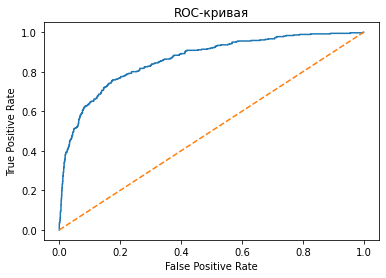

In [104]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

<b>Вывод</b>

В данной работе была оценена работа разных моделей на несбалансированной и сбалансированной выборках. Для этого выборки были подготовлены: категориальные переменные преобразованы в численные методом OHE, численные значения масштабированы. Исследован результат борьбы с дисбалансом методами взвешивания классов, увеличения и уменьшения выборки. Наилучший результат показала модель RandomForestClassifier на выборке с взвешенными классами: F1-мера составила 0,62 при AUC-ROC 0.85. Результат работы этой модели на тестовой выборке удовлетворительный: F1-мера 0.62, AUC-ROC 0,86.